## **Project 1: EDA for Feature Selection using Python**

This analysis of the data is based on the analysis of AMAN KHARWAL.

https://thecleverprogrammer.com/2024/03/04/eda-for-feature-selection-using-python/

Our chosen dataset contains information about some guided riding activities, where the variable we want to predcit is historical cost of the ride. But before starting with the predictions, we are interested in performing a EDA to select the variables to train some ML models. We start by loading the data and we display the first columns just to see the structure of the data.

In [4]:
import pandas as pd

# Load the data
data = pd.read_csv("dynamic_pricing.csv")

# Print first five columns
print(data.head())

   Number_of_Riders  Number_of_Drivers Location_Category  \
0                90                 45             Urban   
1                58                 39          Suburban   
2                42                 31             Rural   
3                89                 28             Rural   
4                78                 22             Rural   

  Customer_Loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
0                  Silver                    13             4.47   
1                  Silver                    72             4.06   
2                  Silver                     0             3.99   
3                 Regular                    67             4.31   
4                 Regular                    74             3.77   

  Time_of_Booking Vehicle_Type  Expected_Ride_Duration  \
0           Night      Premium                      90   
1         Evening      Economy                      43   
2       Afternoon      Premium                      76  

Our goal is to identify the most important features for predicting the Historical_Cost_of_Ride.

### Missing values

Let’s start with the data quality check to identify any missing values or incorrect data types:

In [5]:
# Check for missing values and data types
missing_values = data.isnull().sum()
data_types = data.dtypes

# Display results
missing_values_report = pd.DataFrame({'Missing Values': missing_values, 'Data Type': data_types})
print(missing_values_report)
print("\n")
print(f"Number of variables: {data.shape[1]} and number of observations: {data.shape[0]}")

                         Missing Values Data Type
Number_of_Riders                      0     int64
Number_of_Drivers                     0     int64
Location_Category                     0    object
Customer_Loyalty_Status               0    object
Number_of_Past_Rides                  0     int64
Average_Ratings                       0   float64
Time_of_Booking                       0    object
Vehicle_Type                          0    object
Expected_Ride_Duration                0     int64
Historical_Cost_of_Ride               0   float64


Number of variables: 10 and number of observations: 1000


We get that there is a total of 10 variables and 1000 observations. We observe that no missing vlaues are found, data is complete, and the data types appear appropriate for each feature. However, for categorical variables there is a more efficint way to store the data, because Pandas library allows to define the type category, which maps categorical data to a numerical array for effciciency.

In [6]:
# Define the numerical and categorical columns
numerical_cols = ['Number_of_Riders', 'Number_of_Drivers', 'Number_of_Past_Rides',
                  'Average_Ratings', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride']
categorical_cols = ['Location_Category', 'Customer_Loyalty_Status', 'Time_of_Booking', 'Vehicle_Type']

# Change the type of categorical columns from object to category
for col in categorical_cols:
    data[col] = data[col].astype('category')

data.dtypes # check

Number_of_Riders              int64
Number_of_Drivers             int64
Location_Category          category
Customer_Loyalty_Status    category
Number_of_Past_Rides          int64
Average_Ratings             float64
Time_of_Booking            category
Vehicle_Type               category
Expected_Ride_Duration        int64
Historical_Cost_of_Ride     float64
dtype: object

### Univariate analysis

With data quality checks completed and no immediate data cleaning required, we can move on to Univariate Analysis. It will help us understand the distribution of each variable individually. We start by analyzing the distribution of numerical features. We plot a histogram and the estimated density function in each numeric variable.

       Number_of_Riders  Number_of_Drivers  Number_of_Past_Rides  \
count       1000.000000        1000.000000           1000.000000   
mean          60.372000          27.076000             50.031000   
std           23.701506          19.068346             29.313774   
min           20.000000           5.000000              0.000000   
25%           40.000000          11.000000             25.000000   
50%           60.000000          22.000000             51.000000   
75%           81.000000          38.000000             75.000000   
max          100.000000          89.000000            100.000000   

       Average_Ratings  Expected_Ride_Duration  Historical_Cost_of_Ride  
count      1000.000000              1000.00000              1000.000000  
mean          4.257220                99.58800               372.502623  
std           0.435781                49.16545               187.158756  
min           3.500000                10.00000                25.993449  
25%           3.8

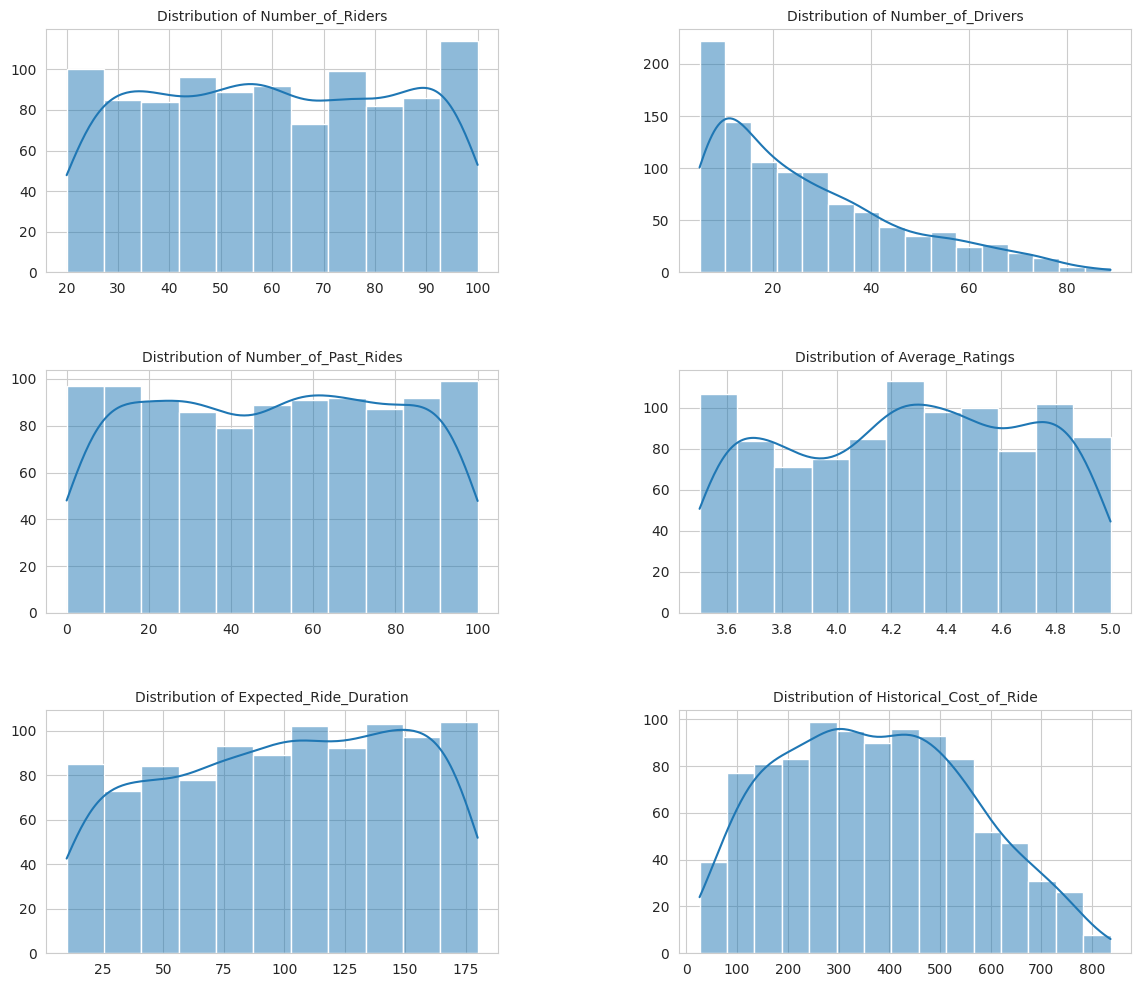

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set_style("whitegrid")

# Descriptive statistics for numerical features
descriptive_stats = data[numerical_cols].describe()
print(descriptive_stats)

# Plotting distributions for numerical features
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.4) # spacing between subplots

for i, col in enumerate(numerical_cols):
    sns.histplot(data[col], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribution of {col}', fontsize=10)
    axes[i//2, i%2].set_xlabel('')
    axes[i//2, i%2].set_ylabel('')

The first summary provides more details about the distribution, including the count, mean, standard deviation, min, max and the quartiles.

The descriptive statistics and distributions for the numerical features provide the following insights:

- **Number_of_Riders**: The distribution is fairly uniform, with values ranging from 20 to 100 riders. It suggests a wide variation in the number of riders per ride.
- **Number_of_Drivers**: This feature appears to be right skewed, which shows that it more common to find a low number of drivers. In addition, we can deduce that there are often fewer drivers available compared to riders.
- **Number_of_Past_Rides**: The distribution of past rides is again quite even, it could be considered as a uniform, since very similar frequencies are found among the possible values.
- **Average_Ratings**: The ratings are fairly normally distributed, with a mean around 4.26, indicating generally positive feedback from customers. The minimum rating is 3.5 and the maximum is 5.0.
- **Expected_Ride_Duration**: The expected ride duration varies significantly from 10 to 180 minutes, with a mean of approximately 99.59 minutes. The distribution is fairly uniform.
- **Historical_Cost_of_Ride**: The cost of rides varies widely, from about 26 to 836 units, with a mean of approximately 372.50 units. The distribution is right-skewed, indicating that most rides cost less than the mean, but there are a few cases where the rides are significantly more expensive.

Next, we explore the categorical features to understand their distribution and how they might relate to the target variable. We use barplots, showing the counts of each category:

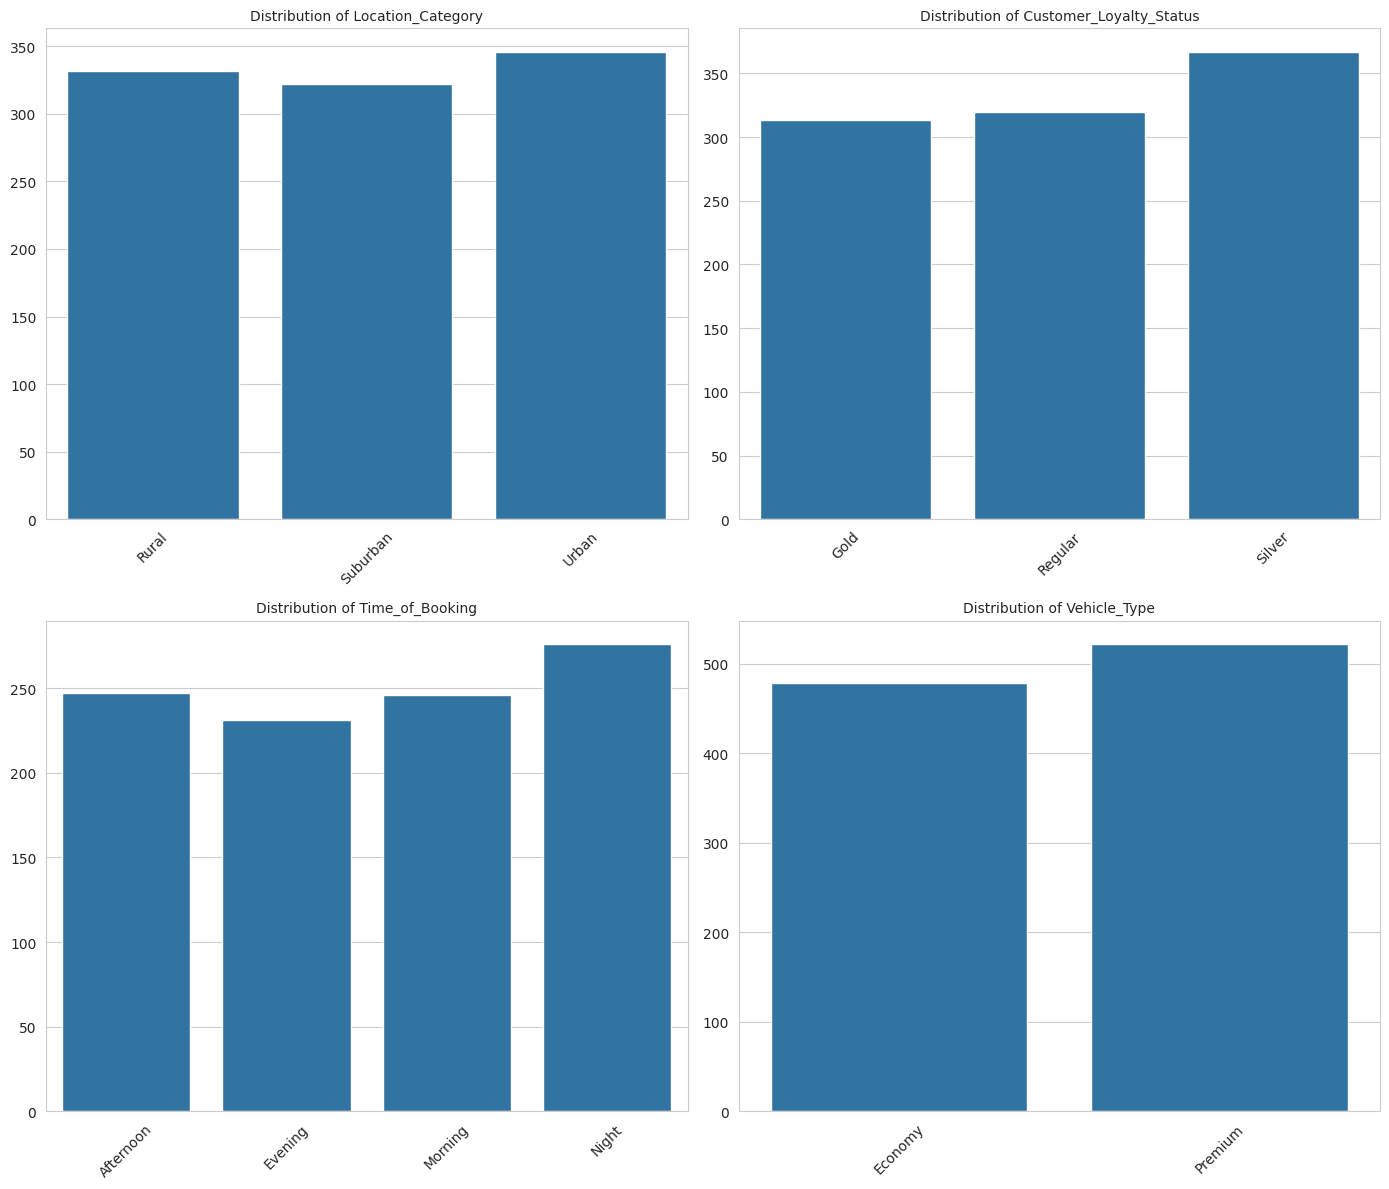

In [8]:
# Plotting distributions for categorical features
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, col in enumerate(categorical_cols):
    sns.countplot(data=data, x=col, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribution of {col}', fontsize=10)
    axes[i//2, i%2].set_xlabel('')
    axes[i//2, i%2].set_ylabel('')
    axes[i//2, i%2].tick_params(axis='x', rotation=45)

plt.tight_layout()

Here is the Univariate Analysis Summary for Categorical Features:

Overall we can see that the categorical variables are very balanced, with very little differences in the counts of each category. This means that very compensated amounts of data has been collected, which will make our results more representative.

- **Location_Category**: The distribution across different location categories shows a variation, with “Urban” likely being the most common, followed by “Suburban” and “Rural” categories. It suggests that the location category could impact the cost of rides, potentially due to differences in demand and availability.
- **Customer_Loyalty_Status**: There are varying levels of loyalty status among customers, including categories like “Silver”, “Regular”, and “Gold”. The distribution indicates a mix of new and loyal customers, which might influence ride costs through loyalty discounts or premium pricing.
- **Time_of_Booking**: The time of booking varies, including “Night”, “Evening”, “Afternoon”, and “Morning”. This feature could affect ride costs due to varying demand at different times of the day.
- **Vehicle_Type**: There is a distribution across different vehicle types, such as “Premium” and “Economy”. The type of vehicle chosen for the ride likely impacts the cost directly, with premium vehicles costing more than economy options.

### Bivariate analysis

After analyzing the distributions of numerical and categorical features, the next step is to perform Bivariate Analysis to explore the relationships between the target variable (Historical_Cost_of_Ride) and the other features. This analysis will help us identify which features have the most significant impact on ride cost, guiding our feature selection process for predictive modelling. Let us proceed with scatterplots of each numeric variables against the target.

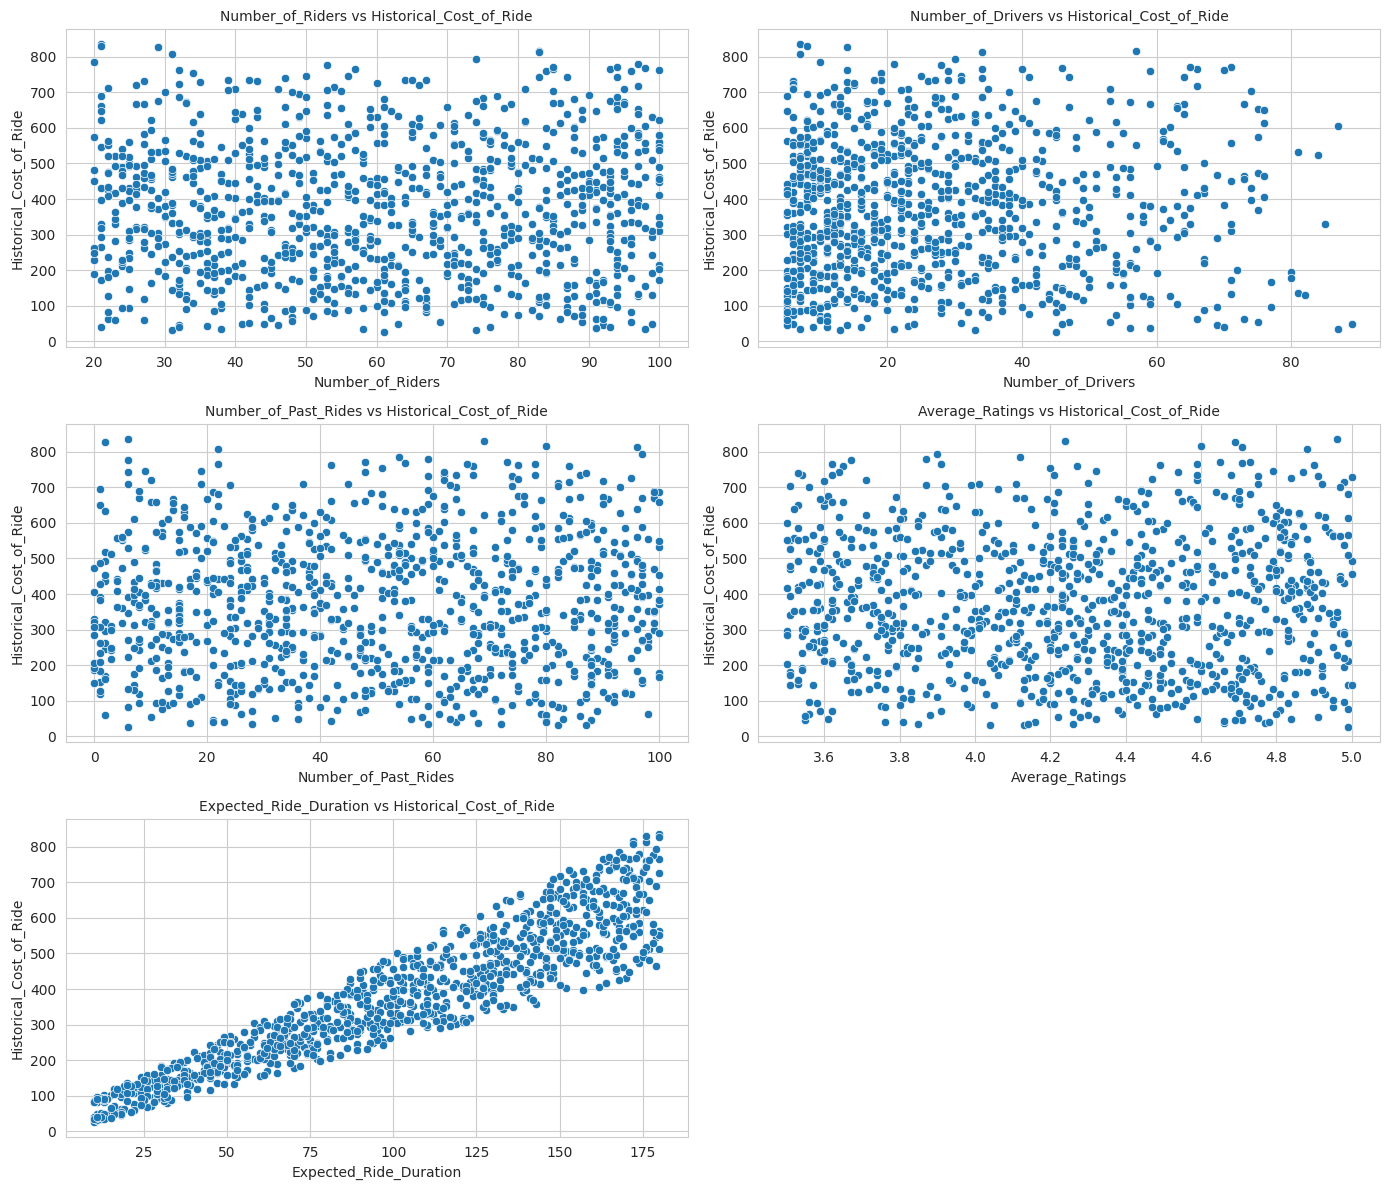

In [ ]:
# Determine the number of rows and columns to plot
num_plots = len(numerical_cols[:-1])
n_cols = 2
n_rows = (num_plots + 1) // n_cols

# Adjust some dimensions for the plotting
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, n_rows * 4))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

axes = axes.flatten() # convert axes int 1D array

# Plot each numerical column against the historical cost
for i, col in enumerate(numerical_cols[:-1]):
    sns.scatterplot(data=data, x=col, y='Historical_Cost_of_Ride', ax=axes[i])
    axes[i].set_title(f'{col} vs Historical_Cost_of_Ride', fontsize=10)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Historical_Cost_of_Ride')

for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

The scatter plots of numerical features against the Historical_Cost_of_Ride reveal several insights:

- **Number_of_Riders**: There does not appear to be a clear linear relationship between the number of riders and the cost of the ride. The distribution of points is quite scattered, suggesting that while the number of riders may influence the cost, it is not a straightforward linear relationship.
- **Number_of_Drivers**: Similar to the number of riders, the number of drivers available does not show a clear linear relationship with the ride cost. It indicates that while driver availability might affect pricing dynamics, it does not do so in a simple, direct manner.
- **Number_of_Past_Rides**: There is no evident linear relationship between the number of past rides a customer has had and the cost of their rides. It suggests that customer loyalty, as measured by the number of past rides, does not directly influence the cost of rides linearly.
- **Average_Ratings**: The scatter plot does not indicate a strong linear relationship between average ratings and ride cost. While we might have expected higher-rated drivers or customers to be associated with higher costs, the data does not support this.
- **Expected_Ride_Duration**: There seems to be a more noticeable relationship here, with a potential trend indicating that longer expected ride durations are associated with higher costs. It is intuitive, as longer rides would naturally cost more.
Given these observations, Expected_Ride_Duration stands out as a numerical feature with a more discernible relationship to the Historical_Cost_of_Ride. The other numerical features do not show clear linear relationships with the ride cost, but they might still contribute information in combination with other features or through non-linear relationships.



For **Number_of_Riders** we get a scatter plot where all the points seem to be uniformly spread with no clear pattern. This suggests **Number_of_Riders** and the target **Historical_Cost_of_Ride** are not related in a straightforward way. An equivalent situation is presented for the variables **Number_of_Past_Rides** and **Average_Ratings**, where they seem to be unrelated to the target variable. Similarly, **Number_of_Drivers** does not show a linear relation with **Historical_Cost_of_Ride**. In this case, most ponts are located in the leftmost part, this could be due to the right skewness of **Number_of_Drivers**. Finally, with the last variable **Expected_Ride_Duration**, there seems to be a more noticeable relationship, with a potential trend indicating that the longer the expected ride durations, the higher the costs.

Next, let us examine how the categorical features relate to the **Historical_Cost_of_Ride** using box plots to explore the variance in ride costs across different categories. It will help identify if certain categories are consistently associated with higher or lower ride costs. We use a boxplot for each cateory and we compare the effect on the ride cost.

Median Historical_Cost_of_Ride by Location_Category:
Location_Category
Rural       367.756592
Suburban    362.699542
Urban       359.955839
Name: Historical_Cost_of_Ride, dtype: float64
Median Historical_Cost_of_Ride by Customer_Loyalty_Status:
Customer_Loyalty_Status
Gold       373.975636
Regular    358.951011
Silver     348.669562
Name: Historical_Cost_of_Ride, dtype: float64
Median Historical_Cost_of_Ride by Time_of_Booking:
Time_of_Booking
Afternoon    387.475538
Evening      360.711170
Morning      382.233056
Night        336.092369
Name: Historical_Cost_of_Ride, dtype: float64
Median Historical_Cost_of_Ride by Vehicle_Type:
Vehicle_Type
Economy    331.230917
Premium    397.587527
Name: Historical_Cost_of_Ride, dtype: float64


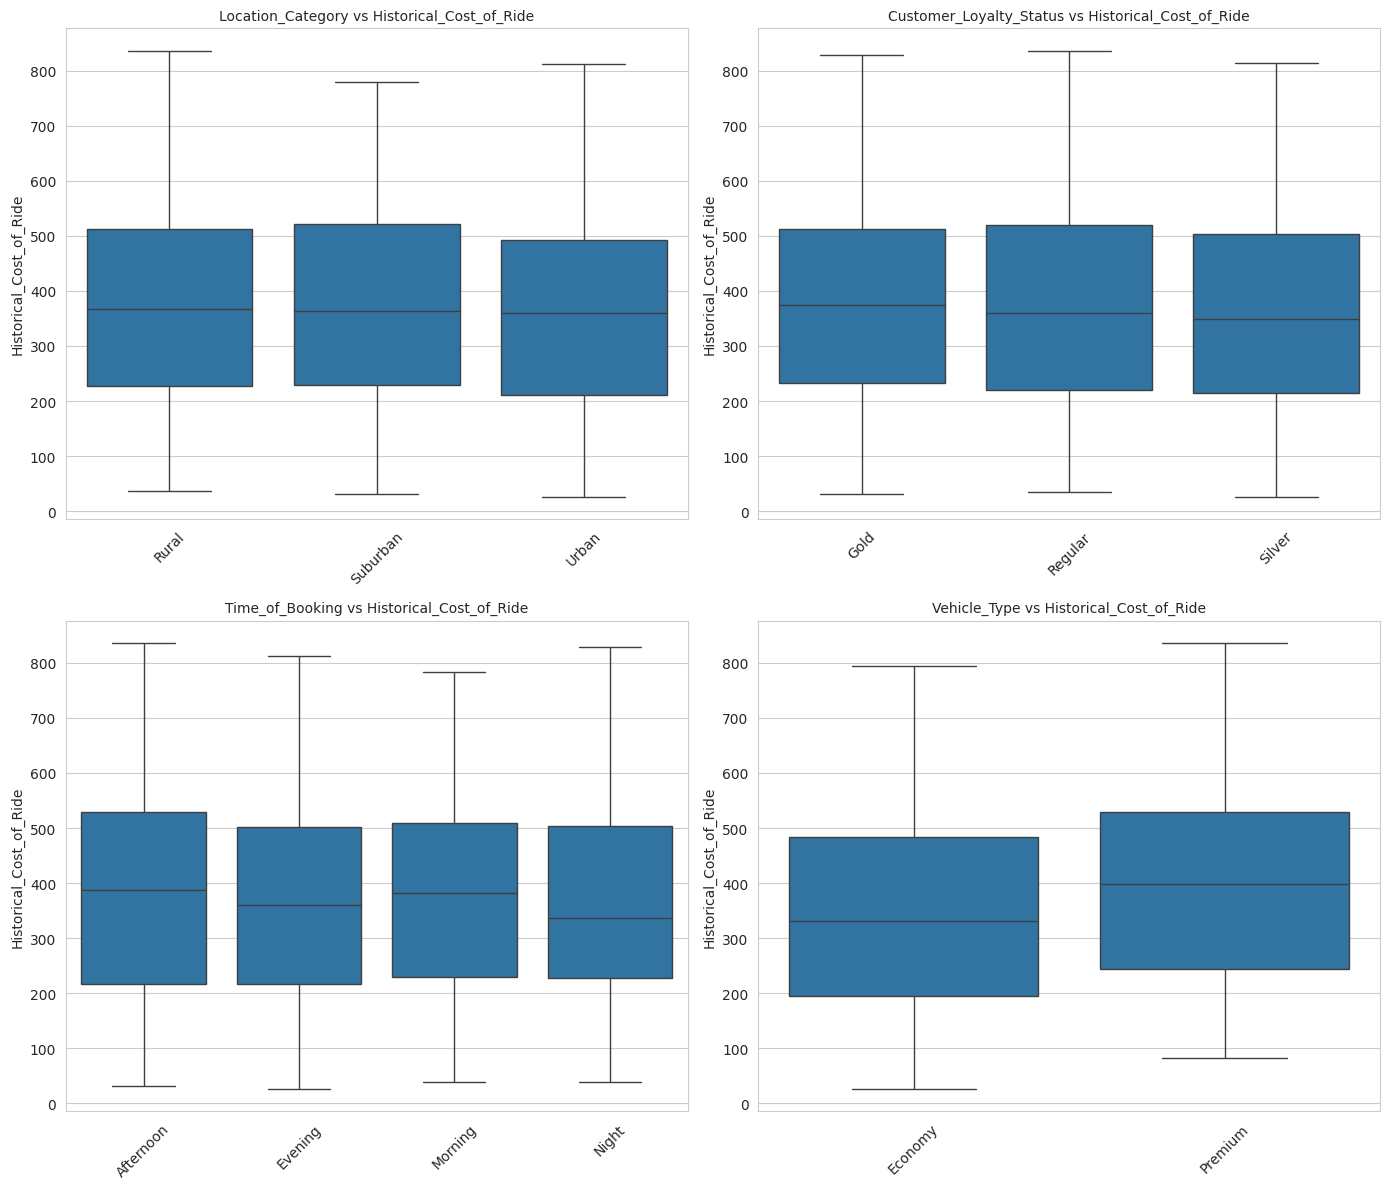

In [ ]:
# Plot categorical features vs historical_cost_of_ride
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, col in enumerate(categorical_cols):
    sns.boxplot(data=data, x=col, y='Historical_Cost_of_Ride', ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'{col} vs Historical_Cost_of_Ride', fontsize=10)
    axes[i//2, i%2].set_xlabel('')
    axes[i//2, i%2].set_ylabel('Historical_Cost_of_Ride')
    axes[i//2, i%2].tick_params(axis='x', rotation=45)

plt.tight_layout()

# Display the median of the cost for each category
for col in categorical_cols:
    median_values = data.groupby(col)['Historical_Cost_of_Ride'].median()
    print(f"Median Historical_Cost_of_Ride by {col}:")
    print(median_values)

The box plots reveal how the **Historical_Cost_of_Ride** varies across different categories for each categorical feature:

- **Location_Category**: Ride costs vary significantly by location category, with “Urban” locations shoqing higher median costs compared to “Suburban” and “Rural” areas. ?It suggests that location plays a crucial role in determining ride costs, likely due to differences in demand, availability, and operational costs.
- **Customer_Loyalty_Status**: There are noticeable differences in ride costs based on the loyalty status of the customer. Specially, the rides evaluated as "Gold" have a higher costs median.
- **Time_of_Booking**: The time of booking appears to impact ride costs, with certain times of day showing different cost distributions. It could reflect demand variations throughout the day, with peak times potentially commanding higher prices.
- **Vehicle_Type**: As expected, the type of vehicle has a significant impact on the cost of rides. “Premium” vehicles generally have higher costs compared to “Economy” vehicles, indicating that vehicle type is a critical factor in pricing.

### Correlations between numeric variables

It is also intereting to compute the correlations between each pair or numerci features. This will help us better identify the variables that are highly correlated to the target and will help us check if there are values collecting similar information, so one of them should be discarted, in order to avoid overfitting.

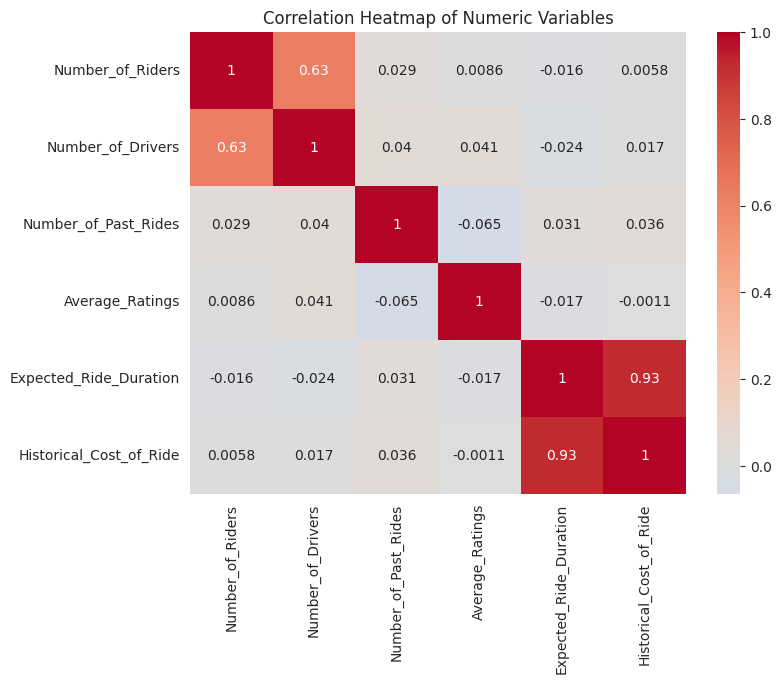

In [ ]:
# Compute the correlation matrix
corr_matrix = data[numerical_cols].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

There is a mdoerately high correlation of around 0.63 between **Number_of_Riders** and **Number_of_Drivers**, so we are colecting redundant information. On the other hand, the variable **Expected_Ride_Duration** is strongly correlated to the target, which reveals that it would be useful for prediciton.

### Insights and feature selection

Based on the EDA, the following features are identified as potentially important for predicting ride costs:

- **Expected_Ride_Duration**: High correlation with ride cost.
- **Location_Category**: Significant variance in costs by location.
- **Customer_Loyalty_Status**: Variability in costs by loyalty status.
- **Time_of_Booking**: At nights ride appears to be more significantly cheaper.
- **Vehicle_Type**: Directly influences cost with clear distinctions between 'Premium' and 'Economy' vehicle types.

The other numerical features (Number_of_Riders, Number_of_Drivers, Number_of_Past_Rides, Average_Ratings) do not show strong linear relationships with the target variable but could still be useful, especially when combined with other features or through engineered features that capture non-linear relationships or interactions.